In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy

# Loading your IBM Quantum account(s)

IBMQ.save_account('fd386c9845f1931c636bff10a0f27322bd91aeca18d7716ac282c7d88e4f51a2345295d5073af63a514eabf627196edd06d60cc18892603106dc51570f042bb5', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))




In [2]:
def createEntangled():
    es = QuantumCircuit(2)
    es.h(1)
    es.cx(1, 0)
    return es

In [3]:
def decode(de):
    de.cx(1,0)
    de.h(1)
    return de

In [4]:
def encode(sdc,msg):
    if msg == "00":
        sdc.i(1)
        return sdc
    elif msg == "01":
        sdc.z(1)
        return sdc
    elif msg == "10":
        sdc.x(1)
        return sdc
    else :
        sdc.y(1)
        return sdc
    

In [ ]:
def misurazioniSim(sdc):
    sdc.measure_all()
    aer_sim = Aer.get_backend('aer_simulator')
    result = aer_sim.run(sdc).result()
    counts = result.get_counts(sdc)
    plot_histogram(counts)

In [6]:
def misurazioniReal(sdc):
    sdc.measure_all()
    job = execute(sdc,backend = device,shots = 1024)
    print(job.job_id())
    job_monitor(job)
    device_result = job.result()
    plot_histogram(device_result.get_counts(sdc))


In [9]:
#Alice vuole mandare i bit 00 a Bob
sdc = createEntangled()
sdc = encode(sdc,"00") #Alice invia
sdc = decode(sdc) #Bob riceve


In [10]:
misurazioniSim(sdc)

{'00': 1024}


In [11]:
misurazioniReal(sdc)

61e30915a90e53646c736239
Job Status: job has been cancelled
Traceback (most recent call last):
  Input In [11] in <module>
    misurazioniReal(sdc)
  Input In [6] in misurazioniReal
    device_result = job.result()
  File /opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/job/ibmqjob.py:279 in result
    raise IBMQJobInvalidStateError('Unable to retrieve result for job {}. '
IBMQJobInvalidStateError: 'Unable to retrieve result for job 61e30915a90e53646c736239. Job was cancelled.'

Use %tb to get the full traceback.


61e302bc84e3d2e38f35fd2e
Job Status: job has successfully run
Traceback (most recent call last):
  Input In [12] in <module>
    misurazioniReal(sdc)
  Input In [11] in misurazioniReal
    plot_histogram(device_result.get_counts())
  File /opt/conda/lib/python3.8/site-packages/qiskit/visualization/counts_visualization.py:222 in plot_histogram
    ax.set_ylim([0.0, min([1.2, max(1.2 * val for val in all_vals)])])
ValueError: max() arg is an empty sequence

Use %tb to get the full traceback.


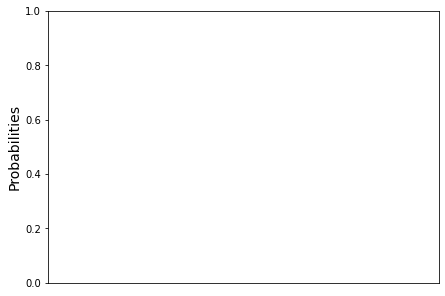

In [12]:
#Alice vuole mandare i bit 01 a Bob
sdc = createEntangled()
sdc = encode(sdc,"01") #Alice invia
sdc = decode(sdc) #Bob riceve

In [ ]:
misurazioniSim(sdc)

In [ ]:
misurazioniReal(sdc)

In [ ]:
#Alice vuole mandare i bit 01 a Bob
sdc = createEntangled()
sdc = encode(sdc,"10") #Alice invia
sdc = decode(sdc) #Bob riceve

In [ ]:
misurazioniSim(sdc)

In [ ]:
misurazioniReal(sdc)

In [ ]:
#Alice vuole mandare i bit 01 a Bob
sdc = createEntangled()
sdc = encode(sdc,"11") #Alice invia
sdc = decode(sdc) #Bob riceve

In [ ]:
misurazioniSim(sdc)

In [ ]:
misurazioniReal(sdc)